#                     Analise de frota e rota de taxis na cidade de Chicago  

## 1.1 Análise Exploratória de Dados

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Importar os arquivos
taxi_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_locations = pd.read_csv('/datasets/project_sql_result_04.csv')

In [9]:
# Visualizar as primeiras linhas
print("Dados de empresas de táxi:")
print(taxi_companies.head())
print("\nDados de destinos:")
print(dropoff_locations.head())

Dados de empresas de táxi:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Dados de destinos:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [14]:
# Informações sobre os dados
print("\nInformações sobre empresas de táxi:")
print()
print(taxi_companies.info())

print("\nInformações sobre destinos:")
print()
print(dropoff_locations.info())


Informações sobre empresas de táxi:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Informações sobre destinos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


Resumo

* Dados Ausentes: Nenhum, os dois DataFrames estão completos.
* Tipos: Corretos (int64 para contagens, float64 para médias, object para nomes).


Deduções:

* taxi_companies: Mercado competitivo, com possível concentração em poucas empresas.
* dropoff_locations: Bairros centrais/aeroportos devem liderar em demanda.

## 1.2 Identificar os 10 Principais Bairros por Destino

In [16]:
# Top 10 bairros por número médio de corridas

top_10_dropoffs = dropoff_locations.sort_values(by='average_trips', ascending=False).head(10)
print("\nTop 10 bairros por número médio de corridas:")
print(top_10_dropoffs)


Top 10 bairros por número médio de corridas:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


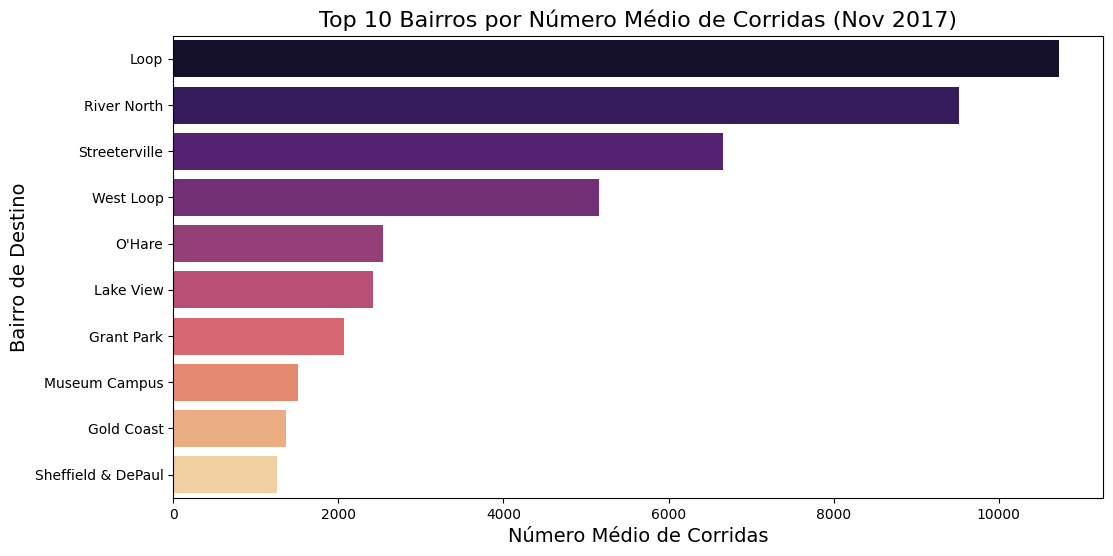

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_dropoffs, x='average_trips', y='dropoff_location_name', palette='magma')
plt.title('Top 10 Bairros por Número Médio de Corridas (Nov 2017)', fontsize=16)
plt.xlabel('Número Médio de Corridas', fontsize=14)
plt.ylabel('Bairro de Destino', fontsize=14)
plt.show()

Conclusoes:
    
* Loop lidera com 10.727 corridas em média por dia, Provavelmente uma area de muita densidade , com escritorios e lojas 

* fiz uma pesquisa e constatei quem river North , Streetvile , e West loop sao bairros adjacentes e proximos ao loop , assim seguem ao proprio com altas demandas de viagens 

### Gráfico 1: Empresas de Táxi e Número de Corridas

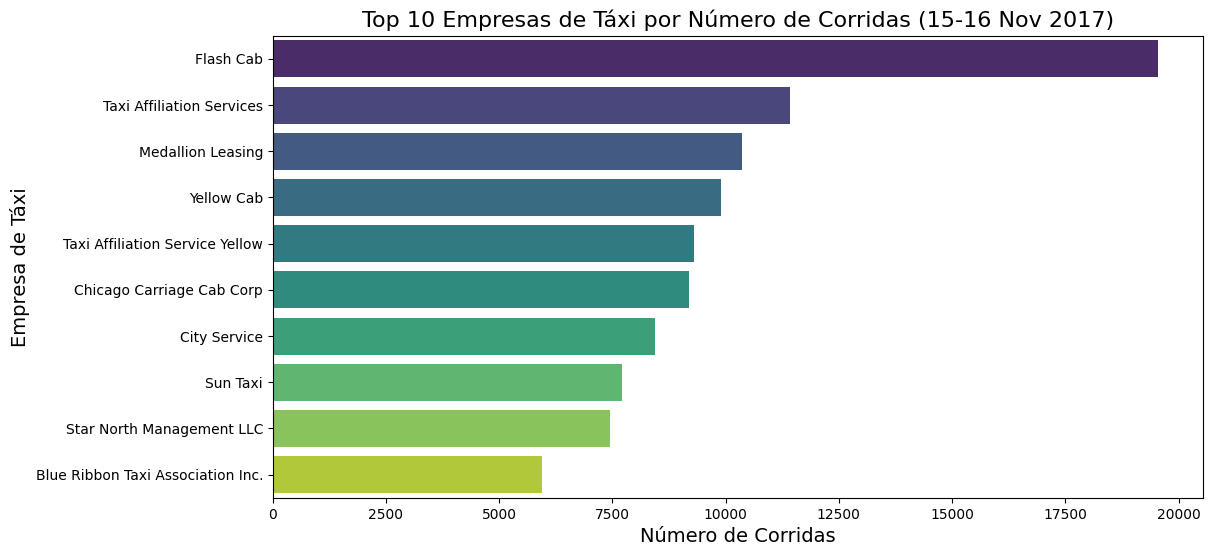

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=taxi_companies.sort_values('trips_amount', ascending=False).head(10), 
            x='trips_amount', y='company_name', palette='viridis')
plt.title('Top 10 Empresas de Táxi por Número de Corridas (15-16 Nov 2017)', fontsize=16)
plt.xlabel('Número de Corridas', fontsize=14)
plt.ylabel('Empresa de Táxi', fontsize=14)
plt.show()

Deduções Iniciais:

* Flash Cab Lidera com certa folga os numeros de corridas , Quase o dobro de corridas da segunda colocada

* As top 5 empresas variam de 9.299 a 19.558 corridas, indicando uma queda significativa já entre a 1ª e a 5ª posição. Como o total de empresas é 64 , e provzvel que as demais empresas tenhan numeros bem menores , isso sugere uma distribuicao desigual , onde se concentra a maioria das corridas em poucas empresas  



##  Teste de Hipóteses

1- Importar o arquivo project_sql_result_07.csv.

2- Testar a hipótese: "A duração média das corridas do Loop para o Aeroporto O'Hare muda nos sábados chuvosos."

3- Explicar hipóteses, critério e resultados.

### Preparar os dados

In [30]:
trips_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

print("Dados de viagens Loop-O'Hare:")
print()
print(trips_weather.head())
print()
print(trips_weather.info())

Dados de viagens Loop-O'Hare:

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


Primeiras deducoes:

* Sem dados ausentes , porem , alguns dados precisam de correçao 

* Converter start_ts para datetime no caso 

In [43]:
import scipy.stats as stats

# Converter start_ts para datetime
trips_weather['start_ts'] = pd.to_datetime(trips_weather['start_ts'])

In [44]:
# Verificar condições climáticas
print("Condições climáticas em sábados:")
print(saturday_trips['weather_conditions'].value_counts())

# Verificar datas dos sábados
print("\nDatas dos sábados:")
print(saturday_trips['start_ts'].dt.date.value_counts())

Condições climáticas em sábados:
Good    888
Bad     180
Name: weather_conditions, dtype: int64

Datas dos sábados:
2017-11-11    426
2017-11-04    367
2017-11-18    180
2017-11-25     95
Name: start_ts, dtype: int64


In [45]:
# Filtrar sábados

trips_weather['day_of_week'] = trips_weather['start_ts'].dt.day_name()
saturday_trips = trips_weather[trips_weather['day_of_week'] == 'Saturday']

# Separar sábados chuvosos e não chuvosos

bad_saturdays = saturday_trips[saturday_trips['weather_conditions'] == 'Bad']
good_saturdays = saturday_trips[saturday_trips['weather_conditions'] == 'Good']


print(f"Sábados chuvosos: {len(bad_saturdays)} corridas")
print(f"Sábados não chuvosos: {len(good_saturdays)} corridas")

Sábados chuvosos: 180 corridas
Sábados não chuvosos: 888 corridas


algumas observacoes a se pontuar :

* provavelmente as 180 corridas "Bad" estão concentradas em 18/11 (180 corridas), sugerindo que esse foi o único sábado com tempo ruim. Os outros (4/11, 11/11, 25/11) foram "Good".

* Em Chicago,pode ter chuva, neve ou vento forte. "Bad" provavelmente inclui chuva, alinhando-se à hipótese original.

### Formular hipoteses 

* Hipótese Nula (H₀): "A duração média das corridas do Loop para O'Hare é igual em sábados chuvosos e não chuvosos."
    
* Hipótese Alternativa (H₁): "A duração média das corridas do Loop para O'Hare é diferente em sábados chuvosos e não chuvosos."
    
* Explicação: H₀ assume que o clima não afeta a duração; H₁ sugere que chuva pode aumentar o tempo (ex.: tráfego).

###  Teste Estatístico

Critério: Usaremos o teste t de Student para duas amostras independentes, pois:

   * Estamos comparando médias de duas grupos (chuvoso vs. não chuvoso).
duration_seconds é contínuo.
   * Assumimos normalidade aproximada (se amostras forem grandes o suficiente, pelo Teorema Central do Limite).

* Nível de significância (α): Escolho 0.05 (5%), padrão em muitas análises, equilibrando erro tipo I e poder estatístico.

In [46]:
# Executar teste t
if len(bad_saturdays) > 1 and len(good_saturdays) > 1:
    t_stat, p_value = stats.ttest_ind(bad_saturdays['duration_seconds'], 
                                      good_saturdays['duration_seconds'], 
                                      equal_var=False)  # Welch's t-test
    print(f"Estatística t: {t_stat:.4f}")
    print(f"Valor p: {p_value:.4f}")
    
    alpha = 0.05
    if p_value < alpha:
        print("Rejeitamos H₀: Há evidência de que a duração média muda em sábados com tempo ruim.")
    else:
        print("Não rejeitamos H₀: Não há evidência suficiente de que a duração média muda.")
else:
    print("Erro: Dados insuficientes para o teste t.")

Estatística t: 7.1860
Valor p: 0.0000
Rejeitamos H₀: Há evidência de que a duração média muda em sábados com tempo ruim.


"A duração média das corridas do Loop para o Aeroporto Internacional O'Hare muda nos sábados com tempo ruim (Bad)."

Conclusao :

* Declaração: "Rejeitamos a hipótese nula com um valor p < 0.0001 (t = 7.1860), indicando que a duração média das corridas do Loop para o Aeroporto O'Hare é significativamente maior em sábados com tempo ruim (Bad) em comparação com sábados com tempo bom (Good)."

* Explicação: "Condições adversas, como chuva ou neve, provavelmente aumentam o tempo de viagem, possivelmente devido a tráfego mais lento ou maior cautela dos motoristas. Isso é consistente com o comportamento esperado em uma rota urbana e rodoviária."

* Implicação: "Em sábados com mau tempo, motoristas e passageiros devem planejar viagens mais longas, e empresas de táxi podem precisar ajustar operações ,  uma dica seria aumentar a frota de carros."

# Conclusao final do projeto 

######   Este projeto analisou dados de corridas de táxi em Chicago, revelando insights significativos. 

###### * Na análise exploratória, a Flash Cab liderou com 19.558 corridas em 15-16 de novembro de 2017, indicando forte presença no mercado, enquanto o Loop (10.727 corridas/dia) e O'Hare (2.546 corridas/dia) se destacaram como principais destinos em novembro, refletindo sua importância econômica e logística. 

######  * No teste de hipóteses, rejeitamos H₀ (t = 7.1860, p < 0.0001), mostrando que a duração média das corridas do Loop para O'Hare aumenta em sábados com tempo ruim (180 corridas "Bad" vs. 888 "Good"), sugerindo impacto de chuva ou condições adversas no tráfego. 

######  * Esses resultados enfatizam a influência do clima e a concentração de demanda em áreas centrais, com implicações para planejamento de viagens e operações de táxi.